# The Battle of the Neighborhoods

## Introduction & Business Problem :

### Problem Background:

The City of Toronto, is the most populous city in the Canada. It is diverse and is the financial capital of Canada. It is multicultural. It provides lot of business oppourtunities and business friendly environment. It has attracted many different players into the market. It is a global hub of business and commerce. The city is a major center for banking and finance, retailing, world trade, transportation, tourism, real estate, new media, traditional media, advertising, legal services, accountancy, insurance, theater, fashion, and the arts in the Canada.

This also means that the market is highly competitive. As it is highly developed city so cost of doing business is also one of the highest. Thus, any new business venture or expansion needs to be analysed carefully. The insights derived from analysis will give good understanding of the business environment which help in strategically targeting the market. This will help in reduction of risk. And the Return on Investment will be reasonable.

### Problem Description:

A restaurant is a business which prepares and serves food and drink to customers in return for money, either paid before the meal, after the meal, or with an open account. The City of Toronto is famous for its excelllent cuisine. It's food culture includes an array of international cuisines influenced by the city's immigrant history.

Central and Eastern European immigrants, especially Jewish immigrants - bagels, cheesecake, hot dogs, knishes, and delicatessens
Jewish immigrants and Irish immigrants - pastrami and corned beef

Chinese and other Asian restaurants, sandwich joints, trattorias, diners, and coffeehouses are ubiquitous throughout the city
mobile food vendors.

So it is evident that to survive in such competitive market it is very important to startegically plan. Various factors need to be studied inorder to decide on the Location such as :

1. Population
2. Demographics
3. Competitor 
4. Crime Rate profile

Analyse the dataset in order to recommend a borough to standup Indian Resturant. 

### Success Criteria:

The success criteria of the project will be a good recommendation of borough/Neighborhood to stand up an Indian Resturant based on Lack of such restaurants in that location and nearest suppliers of ingredients.

In [1]:
import sys
import requests
import pandas as pd
import requests # library to handle requests

from bs4 import BeautifulSoup as bs

# tranform JSON file into a pandas dataframe
from pandas.io.json import json_normalize 

# import k-means from clustering stage
from sklearn.cluster import KMeans

# tranform JSON file into a pandas dataframe
from pandas.io.json import json_normalize 

#### Get all the list of postal code in Canada 

In [2]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
can_ps = requests.get(url)

In [3]:
df_toronto = pd.DataFrame()

toronto_soup = bs(can_ps.text, 'lxml')

toronto_tab = toronto_soup.find_all('table')[0] 

row_marker = 0

for row in toronto_tab.find_all('tr'):
    
    column_marker = 0
    
    columns = row.find_all('td')
    
    for column in columns:
        
        df_toronto.loc[row_marker,column_marker] = column.get_text()
        
        column_marker += 1
        
    row_marker += 1
    
df_toronto.head()
df_toronto.shape

(180, 3)

#### Cleaning the data set

In [4]:
#The column name is not as per the standard. Replace the column name 
#the dataframe will consist of three columns: PostalCode, Borough, and Neighborhood(One of the condition in assignment)
df_toronto.rename(columns={0:'PostalCode',1:'Borough',2:'Neighborhood'}, inplace=True)

#Cleaning new line character from the dataframe
df_toronto = df_toronto.replace('\n','', regex=True)

#Before removing the row where Bourough equals "Not assigned", check how many such value are there. 
df_toronto_Borough_na = df_toronto[df_toronto["Borough"] == "Not assigned" ]

print("number of rows where 'Borough' is not assigned is %d" %(df_toronto_Borough_na.shape[0]))
print("Remaining rows count is %d" %(df_toronto.shape[0] - df_toronto_Borough_na.shape[0]))


df_toronto.head()

number of rows where 'Borough' is not assigned is 77
Remaining rows count is 103


,PostalCode,Borough,Neighborhood
1,M1A,Not assigned,Not assigned
2,M2A,Not assigned,Not assigned
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village
5,M5A,Downtown Toronto,"Regent Park, Harbourfront"


#### Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned. 


In [5]:
#Cleaning the data set and removing the not assigned value
df_toronto = df_toronto[df_toronto["Borough"] !='Not assigned']

#Setting the index again after removal of the row 
df_toronto.reset_index(drop=True,inplace=True)

In [6]:
# Expectation is there will be no record with df_toronto["Borough"] = "Not assigned"
df_toronto[df_toronto["Borough"] == "Not assigned"]

,PostalCode,Borough,Neighborhood


In [7]:
# Check how many neighborhood are there where it is duplicate 
df_toronto_nei = df_toronto[df_toronto['Neighborhood'] == 'Not assigned']
df_toronto_nei

,PostalCode,Borough,Neighborhood


#### If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough

#### More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma

In [8]:
# Creating new dataframe for question 1 
df_toronto_Q1= pd.DataFrame(columns = ['PostalCode','Borough','Neighborhood'])


for ii in range(df_toronto.shape[0]):
    
    df_borough = df_toronto.loc[ii,'Borough']
    df_postalcode = df_toronto.loc[ii,'PostalCode']
    df_neighborhood = df_toronto.loc[ii,'Neighborhood'][:-1]
    
    # If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough
    # ( One of the condition in the assignment )
    if df_neighborhood == 'Not assigned':
        df_neighborhood = borough
    
    #More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, 
    #you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park.
    #These two rows will be combined into one row with the neighborhoods separated with 
    #a comma as shown in row 11 in the above table
    
    if df_postalcode in df_toronto_Q1.PostalCode.values:
        df_old_neighborhood = df_toronto_Q1[df_toronto_Q1.PostalCode == df_postalcode].Neighborhood
        new_value = (old_neighborhood + ',' + df_neighborhood)
        df_toronto_Q1.loc[df_toronto_Q1.PostalCode == postalcode,'Neighborhood'] = new_value 
    
    else:
        df_toronto_Q1 = df_toronto_Q1.append({'PostalCode': df_postalcode,
                                                'Borough': df_borough,
                                                'Neighborhood': df_neighborhood,
                                               }, ignore_index=True)



df_toronto_Q1

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwood
1,M4A,North York,Victoria Villag
2,M5A,Downtown Toronto,"Regent Park, Harbourfron"
3,M6A,North York,"Lawrence Manor, Lawrence Height"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Governmen"
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Villag"
6,M1B,Scarborough,"Malvern, Roug"
7,M3B,North York,Don Mill
8,M4B,East York,"Parkview Hill, Woodbine Garden"
9,M5B,Downtown Toronto,"Garden District, Ryerso"


#### Get the latitude and the longitude coordinates of each neighborhood
#### Create dataframe with latitude and the longitude

In [9]:
from geopy.geocoders import Nominatim  # import geocoder
import pgeocode

nomi = pgeocode.Nominatim('ca')

for zip_cd in df_toronto_Q1["PostalCode"]:
    # loop until you get the coordinates
    
    #geolocator = Nominatim(user_agent="Toronto_Exp")
    #location = geolocator.geocode({"postalcode": 'M1T' , 'countryRegion': 'Canada'})
    location = nomi.query_postal_code(zip_cd)
    
    latitude = location.latitude
    longitude = location.longitude
    
    df_toronto_Q1.loc[df_toronto_Q1["PostalCode"] == zip_cd, "latitude" ] = latitude
    df_toronto_Q1.loc[df_toronto_Q1["PostalCode"] == zip_cd, "longitude" ] = longitude
    
    #print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))
    
df_toronto_Q1.head()

,PostalCode,Borough,Neighborhood,latitude,longitude
0,M3A,North York,Parkwood,43.7545,-79.3300
1,M4A,North York,Victoria Villag,43.7276,-79.3148
2,M5A,Downtown Toronto,"Regent Park, Harbourfron",43.6555,-79.3626
3,M6A,North York,"Lawrence Manor, Lawrence Height",43.7223,-79.4504
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Governmen",43.6641,-79.3889


In [10]:
df_toronto_Q1 = df_toronto_Q1.dropna()
df_toronto_Q1 = df_toronto_Q1.reset_index(drop=True)

In [11]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [12]:
radius = 500 
LIMIT = 50
CLIENT_ID = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX' # your Foursquare ID
CLIENT_SECRET = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

### Lets get the number of vanues in each district and neighbourhood 

### In order to get the result set, iteerate through the data set and pass the latitude and longitude value to the foursquare 

### Explore venue API in order to find out what are the store type available within the postal code

In [13]:
#Lets get the number of vanues in each district and neighbourhood 
#In order to get the result set, iteerate through the data set and pass the latitude and longitude value to the foursquare 
#Explore venue API 

df_concat = pd.DataFrame()
temp_pd = pd.DataFrame()

for tornonto_pc, tornonto_borough, tornonto_neigh, tornonto_lat, tornonto_long in zip(df_toronto_Q1['PostalCode'],df_toronto_Q1['Borough'], df_toronto_Q1['Neighborhood'],df_toronto_Q1['latitude'], df_toronto_Q1['longitude']):
    
    print("Postal Code is ",tornonto_pc)
    print("District Name is ",tornonto_borough)
    print("Neighbourhood Name is ",tornonto_neigh)
    
    neighborhood_latitude  = tornonto_lat
    neighborhood_longitude = tornonto_long
    
    try:
        url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, neighborhood_latitude, neighborhood_longitude, VERSION, radius, LIMIT) 

        results = requests.get(url).json()
    
        venues = results['response']['groups'][0]['items']
    
        nearby_venues = json_normalize(venues) # flatten JSON
        
        # filter columns
        filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
        nearby_venues =nearby_venues.loc[:, filtered_columns]
        
        
        # filter the category for each row
        nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)
        
        # clean columns
        nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
    
        print("#############################################################################")
        
        # Get the total number of place for each categories for the given postal code and transpose the value
        # to create a dataframe with index as postal code
        
        temp_pd = pd.DataFrame(nearby_venues.categories.value_counts()).transpose()
        temp_pd["PostalCode"] = tornonto_pc
        temp_pd.set_index("PostalCode",inplace = True)
        
        
    except:
        print("Error while processing data for postalcode",tornonto_pc)
        print("Error received is ",sys.exc_info())
        
        pass
    
    df_concat = pd.concat([df_concat, temp_pd])

Postal Code is  M3A
District Name is  North York
Neighbourhood Name is  Parkwood
#############################################################################
Postal Code is  M4A
District Name is  North York
Neighbourhood Name is  Victoria Villag
#############################################################################
Postal Code is  M5A
District Name is  Downtown Toronto
Neighbourhood Name is  Regent Park, Harbourfron


C:\Users\supriya\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



#############################################################################
Postal Code is  M6A
District Name is  North York
Neighbourhood Name is  Lawrence Manor, Lawrence Height
#############################################################################
Postal Code is  M7A
District Name is  Downtown Toronto
Neighbourhood Name is  Queen's Park, Ontario Provincial Governmen
#############################################################################
Postal Code is  M9A
District Name is  Etobicoke
Neighbourhood Name is  Islington Avenue, Humber Valley Villag
#############################################################################
Postal Code is  M1B
District Name is  Scarborough
Neighbourhood Name is  Malvern, Roug
#############################################################################
Postal Code is  M3B
District Name is  North York
Neighbourhood Name is  Don Mill
#############################################################################
Postal Code is  M4B
District 

#############################################################################
Postal Code is  M6L
District Name is  North York
Neighbourhood Name is  North Park, Maple Leaf Park, Upwood Par
#############################################################################
Postal Code is  M9L
District Name is  North York
Neighbourhood Name is  Humber Summi
#############################################################################
Postal Code is  M1M
District Name is  Scarborough
Neighbourhood Name is  Cliffside, Cliffcrest, Scarborough Village Wes
#############################################################################
Postal Code is  M2M
District Name is  North York
Neighbourhood Name is  Willowdale, Newtonbroo
#############################################################################
Postal Code is  M3M
District Name is  North York
Neighbourhood Name is  Downsvie
#############################################################################
Postal Code is  M4M
District Name is  E

#############################################################################
Postal Code is  M1X
District Name is  Scarborough
Neighbourhood Name is  Upper Roug
Error while processing data for postalcode M1X
Error received is  (<class 'KeyError'>, KeyError("None of [['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']] are in the [columns]",), <traceback object at 0x00000211D9D2BEC8>)
Postal Code is  M4X
District Name is  Downtown Toronto
Neighbourhood Name is  St. James Town, Cabbagetow
#############################################################################
Postal Code is  M5X
District Name is  Downtown Toronto
Neighbourhood Name is  First Canadian Place, Underground cit
#############################################################################
Postal Code is  M8X
District Name is  Etobicoke
Neighbourhood Name is  The Kingsway, Montgomery Road, Old Mill Nort
#############################################################################
Postal Code is

In [14]:
# Creating copy of the dataframe and replacing space in the column name with "_"

df_tmp = df_toronto_Q1.copy()
df_concat_tmp = df_concat.copy()

df_concat_tmp.columns = df_concat_tmp.columns.str.replace(' ', '_')
df_tmp.set_index("PostalCode",inplace=True)

df_concat_tmp.head()

,Accessories_Store,Afghan_Restaurant,Airport,American_Restaurant,Art_Gallery,Art_Museum,Arts_&_Crafts_Store,Asian_Restaurant,Athletics_&_Sports,Auto_Dealership,...,Vegetarian_/_Vegan_Restaurant,Video_Game_Store,Video_Store,Vietnamese_Restaurant,Warehouse_Store,Wine_Bar,Wine_Shop,Wings_Joint,Women's_Store,Yoga_Studio
PostalCode,,,,,,,,,,,,,,,,,,,,,
M3A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M4A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M5A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0
M6A,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
M7A,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [15]:
df_tmp.head()
df_with_venue = df_tmp.join(df_concat_tmp,on = ["PostalCode"] , rsuffix='_left')
df_with_venue.reset_index(inplace=True)
#df_with_venue.fillna(0,inplace=True)
df_with_venue.head()

,PostalCode,Borough,Neighborhood,latitude,longitude,Accessories_Store,Afghan_Restaurant,Airport,American_Restaurant,Art_Gallery,...,Vegetarian_/_Vegan_Restaurant,Video_Game_Store,Video_Store,Vietnamese_Restaurant,Warehouse_Store,Wine_Bar,Wine_Shop,Wings_Joint,Women's_Store,Yoga_Studio
0,M3A,North York,Parkwood,43.7545,-79.3300,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,M4A,North York,Victoria Villag,43.7276,-79.3148,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,M5A,Downtown Toronto,"Regent Park, Harbourfron",43.6555,-79.3626,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0
3,M6A,North York,"Lawrence Manor, Lawrence Height",43.7223,-79.4504,NaN,NaN,NaN,1.0,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Governmen",43.6641,-79.3889,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


### Find out total number of indian resturant for all the Borough in Toronto City 

In [16]:
#Find out all the district having the Indian Restaurant 
df_venue_reqr = df_with_venue.loc[:,df_with_venue.columns.str.contains('postalcode|Borough|Neighborhood|latitude|longitude|india|asian|bank|gas|department|market', case=False,regex=True)]

df_indian_restaurant = df_venue_reqr[df_venue_reqr["Indian_Restaurant"].notnull()]
df_indian_restaurant.sort_values(["Indian_Restaurant"],ascending=False)  

df_temp_rest = df_indian_restaurant[["Borough","Indian_Restaurant"]].groupby("Borough").sum()
df_temp_rest_bo = df_temp_rest.sort_values("Indian_Restaurant",ascending=False)

#Find out what is the population of the district "East York","Downtown Toronto" and "Central Toronto"
df_indian_restaurant.sort_values(["Indian_Restaurant"],ascending=False).head()

df_temp_rest_bo

,Indian_Restaurant
Borough,
East York,4.0
Downtown Toronto,3.0
Central Toronto,2.0
East Toronto,1.0
North York,1.0
West Toronto,1.0


In [17]:
#Draw a pie chart
import matplotlib.pyplot as plt 

labels = df_temp_rest_bo.index.values
type(labels)

df_temp_rest_bo.plot(y='Indian_Restaurant',figsize=(5, 5),autopct='%1.1f%%', startangle=90,kind='pie',labeldistance=1).legend(bbox_to_anchor=(1.2, 0.5))


#### Looking at the above presence, it seems Indian resturent is promitent most in "East York" district followed by "Downtown Toronto" and "Central Toronto" . Lets find the population density and Indian ethinicity population in "East York" , "Downtown Toronto" and "Central Toronto" district

### This is done by scrapping the html page https://en.wikipedia.org/wiki/Demographics_of_Toronto

In [18]:
# https://en.wikipedia.org/wiki/Demographics_of_Toronto

url_to = r'https://en.wikipedia.org/wiki/Demographics_of_Toronto'
df_imm_to = pd.read_html(url_to,header=1)

#Get number of tables present on this html page 
print("Number of tables present on the html page is %d\n" %len(df_imm_to))


Number of tables present on the html page is 38



### Visible Minorities as % of Population (2016 Census) & Top Ethnic Origins

In [19]:
#Visible Minorities as % of Population (2016 Census) & Top Ethnic Origins
print("Visible Minorities as % of Population (2016 Census) & Top Ethnic Origins\n")
df_to_mn_pop = df_imm_to[6]
df_to_mn_pop.head()

Visible Minorities as % of Population (2016 Census) & Top Ethnic Origins



,Riding (2013 Redistribution),Percentage,Most Populous Ethnic Origin,Percentage.1,Top Riding for Ethnic Origin (Percentage),Most Populous Visible Minority,Percentage.2,Top Riding for Visible Minority (Percentage)
0,Parkdale-High Park,26.2,English,22.3,Irish (20.0); German (9.8); French (8.9),Black,5.3,NaN
1,Etobicoke Centre,27.1,Italian,15.1,Italian (15.1); Ukrainian (8.1),South Asian,5.9,NaN
2,Etobicoke-Lakeshore,27.7,English,17.1,NaN,South Asian,5.5,NaN
3,Toronto-St. Paul's,28.3,English,18.5,NaN,Black,5.1,NaN
4,Eglinton-Lawrence,31.8,Canadian,14.7,Polish (12.0),Filipino,10.7,NaN


### Visible Minorities as % of Population from 2001 to 2011 Census 

In [20]:
#Visible Minorities as % of Population
print("Visible Minorities as % of Population\n")

df_mn_pct_pop = df_imm_to[7]
df_mn_pct_pop

Visible Minorities as % of Population



,Riding (2003 Redistribution),2011 NHS,2006 Census,2001 Census
0,Etobicoke-Lakeshore,23.8,20.8,19.1
1,Parkdale-High Park,25.6,26.1,26.8
2,St. Paul's,25.8,23.3,22.4
3,Etobicoke Centre,27.5,25.3,22.3
4,Eglinton-Lawrence,28.9,24.7,21.1
5,Beaches-East York,31.7,31.3,29.4
6,Toronto-Danforth,32.7,33.9,36.3
7,Davenport,33.0,33.2,31.6
8,Trinity-Spadina,37.2,36.5,35.3
9,Toronto Centre,40.8,41.0,41.3


### Age group diversification 

In [21]:
df_imm_area = pd.read_html(url_to,header=0)

# Population diversity by Age group and sex 
print(" Population diversity by Age group and sex")

df_to_pop_age = df_imm_area[1]

df_to_pop_age

 Population diversity by Age group and sex


,Age Groups,Total,Male,Female
0,0 to 14 years,398135,204190,193945
1,0 to 4 years,136000,69895,66105
2,5 to 9 years,135025,69345,65680
3,10 to 14 years,127105,64940,62165
4,15 to 64 years,1906495,925070,981420
5,15 to 19 years,145525,74240,71280
6,20 to 24 years,194750,97415,97330
7,25 to 29 years,232945,113905,119035
8,30 to 34 years,224580,108895,115680
9,35 to 39 years,196310,94065,102240


In [22]:
#df_to_pop_age.plot(kind='bar')

### Highest concentration area for each ethinic community

In [23]:
#Highest concentration area for each ethinic community 
print("Highest concentration area for each ethinic community ")
df_pop_eth = df_imm_area[4]

df_pop_eth.rename(columns ={"Population (2016)[33]":"Population in 2016","Percentage.1":"Percentage"},inplace=True)

df_pop_eth

Highest concentration area for each ethinic community 


,Top 20 Ethnic origins in the City of Toronto,Population in 2016,Percentage,Riding with Highest Concentration,Percentage
0,Chinese,332830,12.5,Scarborough—Agincourt,47.0
1,English,331890,12.3,Beaches—East York,24.2
2,Canadian,323175,12.0,Beaches-East York,19.7
3,Irish,262965,9.8,Parkdale—High Park,20.0
4,Scottish,256250,9.5,Beaches—East York,18.9
5,East Indian,202675,7.5,Etobicoke North,22.2
6,Italian,182495,6.8,Etobicoke Centre,15.1
7,Filipino,162605,6.0,York Centre,17.0
8,German,130900,4.9,Parkdale—High Park,9.8
9,French,122615,4.6,Parkdale—High Park,8.9


### Concentrations of ethnic groups in TORONTO & EAST YORK 

In [24]:
#TORONTO & EAST YORK 
print("Concentrations of ethnic groups in TORONTO & EAST YORK\n")
df_pop_Tor = df_imm_area[8]

df_pop_Tor.rename(columns={"Ethnic Group #1":"Ethnic Group Position 1","Ethnic Group #2":"Ethnic Group Position 2","Ethnic Group #3":"Ethnic Group Position 3","Ethnic Group #4":"Ethnic Group Position 4"},inplace=True)
df_pop_Tor.rename(columns={"%":"Group 1 Percentage","%.1":"Group 2 Percentage","%.2":"Group 3 Percentage","%.3":"Group 4 Percentage"},inplace=True)

df_pop_Tor["Borough"] = "TORONTO & EAST YORK"

df_pop_Tor

Concentrations of ethnic groups in TORONTO & EAST YORK



,Riding,Population,Ethnic Group Position 1,Group 1 Percentage,Ethnic Group Position 2,Group 2 Percentage,Ethnic Group Position 3,Group 3 Percentage,Ethnic Group Position 4,Group 4 Percentage,Borough
0,Spadina-Fort York,114315,White,56.3,Chinese,14.8,South Asian,8.3,Black,5.1,TORONTO & EAST YORK
1,Beaches-East York,108435,White,64.5,South Asian,10.9,Black,6.6,Chinese,5.7,TORONTO & EAST YORK
2,Davenport,107395,White,66.9,Black,6.4,Chinese,5.9,Latin American,5.4,TORONTO & EAST YORK
3,Parkdale-High Park,106445,White,72.4,Black,5.3,NaN,NaN,NaN,NaN,TORONTO & EAST YORK
4,Toronto-Danforth,105395,White,65.5,Chinese,12.3,South Asian,5.4,Black,5.0,TORONTO & EAST YORK
5,Toronto-St. Paul's,104940,White,70.8,Black,5.1,NaN,NaN,NaN,NaN,TORONTO & EAST YORK
6,University-Rosedale,100520,White,66.5,Chinese,14.0,NaN,NaN,NaN,NaN,TORONTO & EAST YORK
7,Toronto Centre,99590,White,48.8,South Asian,11.8,Chinese,11.1,Black,9.1,TORONTO & EAST YORK


### Concentrations of ethnic groups in NORTH YORK

In [25]:
#NORTH YORK
print("Concentrations of ethnic groups in North YORK\n")
df_pop_ny = df_imm_area[9]
df_pop_ny.rename(columns={"Ethnic Group #1":"Ethnic Group Position 1","Ethnic Group #2":"Ethnic Group Position 2","Ethnic Group #3":"Ethnic Group Position 3","Ethnic Group #4":"Ethnic Group Position 4","Ethnic Group #5":"Ethnic Group Position 5","Ethnic Group #6":"Ethnic Group Position 6"},inplace=True)
df_pop_ny.rename(columns={"%":"Group 1 Percentage","%.1":"Group 2 Percentage","%.2":"Group 3 Percentage","%.3":"Group 4 Percentage","%.4":"Group 5 Percentage","%.5":"Group 6 Percentage"},inplace=True)
df_pop_ny["Borough"] = "NORTH YORK"

df_pop_ny

Concentrations of ethnic groups in North YORK



,Riding,Population,Ethnic Group Position 1,Group 1 Percentage,Ethnic Group Position 2,Group 2 Percentage,Ethnic Group Position 3,Group 3 Percentage,Ethnic Group Position 4,Group 4 Percentage,Ethnic Group Position 5,Group 5 Percentage,Ethnic Group Position 6,Group 6 Percentage,Borough
0,Willowdale,117405,White,33.1,Chinese,25.3,West Asian,10.9,Korean,10.3,South Asian,5.9,Filipino,5.4,NORTH YORK
1,Eglinton-Lawrence,112925,White,67.7,Filipino,10.7,Black,5.5,NaN,NaN,NaN,NaN,NaN,NaN,NORTH YORK
2,Don Valley North,109060,Chinese,31.3,White,29.4,South Asian,10.2,West Asian,7.6,NaN,NaN,NaN,NaN,NORTH YORK
3,Humber River-Black Creek,107725,White,25.4,Black,22.8,Latin American,9.5,Southeast Asian,8.9,Filipino,5.5,NaN,NaN,NORTH YORK
4,York Centre,103760,White,53.1,Filipino,16.5,Black,7.9,Latin American,5.1,NaN,NaN,NaN,NaN,NORTH YORK
5,Don Valley West,101790,White,57.9,South Asian,13.3,Chinese,10.6,NaN,NaN,NaN,NaN,NaN,NaN,NORTH YORK
6,Don Valley East,93170,White,40.9,South Asian,17.1,Black,9.3,Chinese,7.5,Filipino,7.4,West Asian,5.5,NORTH YORK


### Concentrations of ethnic groups in SCARBOROUGH

In [26]:
#SCARBOROUGH
print("Concentrations of ethnic groups in SCARBOROUGH\n")
df_pop_sc = df_imm_area[10]

df_pop_sc.rename(columns={"Ethnic Group #1":"Ethnic Group Position 1","Ethnic Group #2":"Ethnic Group Position 2","Ethnic Group #3":"Ethnic Group Position 3","Ethnic Group #4":"Ethnic Group Position 4","Ethnic Group #5":"Ethnic Group Position 5"},inplace=True)
df_pop_sc.rename(columns={"%":"Group 1 Percentage","%.1":"Group 2 Percentage","%.2":"Group 3 Percentage","%.3":"Group 4 Percentage","%.4":"Group 5 Percentage"},inplace=True)
df_pop_sc["Borough"] = "SCARBOROUGH"

df_pop_sc

Concentrations of ethnic groups in SCARBOROUGH



,Riding,Population,Ethnic Group Position 1,Group 1 Percentage,Ethnic Group Position 2,Group 2 Percentage,Ethnic Group Position 3,Group 3 Percentage,Ethnic Group Position 4,Group 4 Percentage,Ethnic Group Position 5,Group 5 Percentage,Borough
0,Scarborough Centre,110450,White,29.4,South Asian,25.6,Filipino,12.5,Black,9.6,Chinese,9.3,SCARBOROUGH
1,Scarborough Southwest,108295,White,42.0,South Asian,21.6,Black,11.2,Filipino,9.0,Chinese,5.8,SCARBOROUGH
2,Scarborough-Agincourt,104225,Chinese,45.8,White,19.1,South Asian,14.0,Black,6.3,Filipino,5.4,SCARBOROUGH
3,Scarborough-Rouge Park,101445,South Asian,32.6,White,26.8,Black,15.9,Filipino,8.7,NaN,NaN,SCARBOROUGH
4,Scarborough-Guildwood,101115,South Asian,33.2,White,27.6,Black,14.3,Filipino,7.9,Chinese,5.4,SCARBOROUGH
5,Scarborough North,97610,Chinese,45.0,South Asian,26.1,Black,7.6,White,7.6,Filipino,6.4,SCARBOROUGH


### Concentrations of ethnic groups in ETOBICOKE & YORK

In [27]:
#ETOBICOKE & YORK
print("Concentrations of ethnic groups in ETOBICOKE & YORK\n")
df_pop_et = df_imm_area[11]

df_pop_et.rename(columns={"Ethnic Group #1":"Ethnic Group Position 1","Ethnic Group #2":"Ethnic Group Position 2","Ethnic Group #3":"Ethnic Group Position 3","Ethnic Group #4":"Ethnic Group Position 4","Ethnic Group #5":"Ethnic Group Position 5"},inplace=True)
df_pop_et.rename(columns={"%":"Group 1 Percentage","%.1":"Group 2 Percentage","%.2":"Group 3 Percentage","%.3":"Group 4 Percentage","%.4":"Group 5 Percentage"},inplace=True)

df_pop_et["Borough"] = "ETOBICOKE & YORK"

df_pop_et

Concentrations of ethnic groups in ETOBICOKE & YORK



,Riding,Population,Ethnic Group Position 1,Group 1 Percentage,Ethnic Group Position 2,Group 2 Percentage,Ethnic Group Position 3,Group 3 Percentage,Ethnic Group Position 4,Group 4 Percentage,Ethnic Group Position 5,Group 5 Percentage,Borough
0,Etobicoke-Lakeshore,127520,White,71.3,South Asian,5.5,Black,5.0,NaN,NaN,NaN,NaN,ETOBICOKE & YORK
1,Etobicoke North,116960,South Asian,28.9,White,23.8,Black,23.4,NaN,NaN,NaN,NaN,ETOBICOKE & YORK
2,Etobicoke Centre,116055,White,72.3,South Asian,5.9,Black,5.9,NaN,NaN,NaN,NaN,ETOBICOKE & YORK
3,York South-Weston,115130,White,44.2,Black,23.2,Latin American,8.5,Filipino,5.9,South Asian,5.7,ETOBICOKE & YORK


### Concatenate all the ethinicity by borough dataframe into one

In [28]:
frames = [df_pop_Tor,df_pop_ny,df_pop_sc,df_pop_et]
df_pop_result = pd.DataFrame()
#df_pop_result = df_pop_Tor.copy()
# df_pop_result.append(df_pop_ny)
# df_pop_result.append(df_pop_sc)
# df_pop_result.append(df_pop_et)

df_pop_result = pd.concat([df_pop_Tor,df_pop_ny,df_pop_sc,df_pop_et])
df_pop_result.reset_index(inplace=True)
df_pop_result.drop("index",axis=1,inplace=True)
df_pop_result

C:\Users\supriya\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,Borough,Ethnic Group Position 1,Ethnic Group Position 2,Ethnic Group Position 3,Ethnic Group Position 4,Ethnic Group Position 5,Ethnic Group Position 6,Group 1 Percentage,Group 2 Percentage,Group 3 Percentage,Group 4 Percentage,Group 5 Percentage,Group 6 Percentage,Population,Riding
0,TORONTO & EAST YORK,White,Chinese,South Asian,Black,NaN,NaN,56.3,14.8,8.3,5.1,NaN,NaN,114315,Spadina-Fort York
1,TORONTO & EAST YORK,White,South Asian,Black,Chinese,NaN,NaN,64.5,10.9,6.6,5.7,NaN,NaN,108435,Beaches-East York
2,TORONTO & EAST YORK,White,Black,Chinese,Latin American,NaN,NaN,66.9,6.4,5.9,5.4,NaN,NaN,107395,Davenport
3,TORONTO & EAST YORK,White,Black,NaN,NaN,NaN,NaN,72.4,5.3,NaN,NaN,NaN,NaN,106445,Parkdale-High Park
4,TORONTO & EAST YORK,White,Chinese,South Asian,Black,NaN,NaN,65.5,12.3,5.4,5.0,NaN,NaN,105395,Toronto-Danforth
5,TORONTO & EAST YORK,White,Black,NaN,NaN,NaN,NaN,70.8,5.1,NaN,NaN,NaN,NaN,104940,Toronto-St. Paul's
6,TORONTO & EAST YORK,White,Chinese,NaN,NaN,NaN,NaN,66.5,14.0,NaN,NaN,NaN,NaN,100520,University-Rosedale
7,TORONTO & EAST YORK,White,South Asian,Chinese,Black,NaN,NaN,48.8,11.8,11.1,9.1,NaN,NaN,99590,Toronto Centre
8,NORTH YORK,White,Chinese,West Asian,Korean,South Asian,Filipino,33.1,25.3,10.9,10.3,5.9,5.4,117405,Willowdale
9,NORTH YORK,White,Filipino,Black,NaN,NaN,NaN,67.7,10.7,5.5,NaN,NaN,NaN,112925,Eglinton-Lawrence


### Find out South Asian which includes India as well are prominent in which Borough 

In [29]:
df_ethinicity_1_cnt = pd.DataFrame(df_pop_result.groupby("Ethnic Group Position 1")["Group 1 Percentage"].nunique())
df_ethinicity_1_cnt.reset_index(inplace=True)
df_ethinicity_1_cnt.rename(columns={"Ethnic Group Position 1":"Ethinicity","Group 1 Percentage":"Count"},inplace=True)
df_ethinicity_1_cnt["Group"] = "Ethnic Group Position 1"

df_ethinicity_1_cnt


df_ethinicity_2_cnt = pd.DataFrame(df_pop_result.groupby("Ethnic Group Position 2")["Group 2 Percentage"].nunique())
df_ethinicity_2_cnt.reset_index(inplace=True)
df_ethinicity_2_cnt.rename(columns={"Ethnic Group Position 2":"Ethinicity","Group 2 Percentage":"Count"},inplace=True)
df_ethinicity_2_cnt["Group"] = "Ethnic Group Position 2"

df_ethinicity_2_cnt

df_ethinicity_3_cnt = pd.DataFrame(df_pop_result.groupby("Ethnic Group Position 3")["Group 3 Percentage"].nunique())
df_ethinicity_3_cnt.reset_index(inplace=True)
df_ethinicity_3_cnt.rename(columns={"Ethnic Group Position 3":"Ethinicity","Group 3 Percentage":"Count"},inplace=True)
df_ethinicity_3_cnt["Group"] = "Ethnic Group Position 3"

df_ethinicity_3_cnt

df_ethinicity_4_cnt = pd.DataFrame(df_pop_result.groupby("Ethnic Group Position 4")["Group 4 Percentage"].nunique())
df_ethinicity_4_cnt.reset_index(inplace=True)
df_ethinicity_4_cnt.rename(columns={"Ethnic Group Position 4":"Ethinicity","Group 4 Percentage":"Count"},inplace=True)
df_ethinicity_4_cnt["Group"] = "Ethnic Group Position 4"

df_ethinicity_4_cnt

conc_list = [df_ethinicity_1_cnt,df_ethinicity_2_cnt,df_ethinicity_3_cnt,df_ethinicity_4_cnt]

conc_df = pd.DataFrame()

conc_df = pd.concat(conc_list)

conc_df.reset_index(inplace=True)

conc_df.drop("index",axis=1,inplace=True)

conc_df[conc_df["Ethinicity"] == "South Asian"]


,Ethinicity,Count,Group
1,South Asian,3,Ethnic Group Position 1
6,South Asian,9,Ethnic Group Position 2
12,South Asian,4,Ethnic Group Position 3


### South Asian Countries are prominent in Group 1, Group 2 and Group 3 which means in any locality the population percentage is at 1st and 2nd or at 3rd position

#### So, find the borough and locality where the South Asian are at First, second and third postition 


In [30]:
df_pop_result[ (df_pop_result["Ethnic Group Position 1"] == "South Asian") | ( df_pop_result["Ethnic Group Position 2"] == "South Asian" ) ]

,Borough,Ethnic Group Position 1,Ethnic Group Position 2,Ethnic Group Position 3,Ethnic Group Position 4,Ethnic Group Position 5,Ethnic Group Position 6,Group 1 Percentage,Group 2 Percentage,Group 3 Percentage,Group 4 Percentage,Group 5 Percentage,Group 6 Percentage,Population,Riding
1,TORONTO & EAST YORK,White,South Asian,Black,Chinese,NaN,NaN,64.5,10.9,6.6,5.7,NaN,NaN,108435,Beaches-East York
7,TORONTO & EAST YORK,White,South Asian,Chinese,Black,NaN,NaN,48.8,11.8,11.1,9.1,NaN,NaN,99590,Toronto Centre
13,NORTH YORK,White,South Asian,Chinese,NaN,NaN,NaN,57.9,13.3,10.6,NaN,NaN,NaN,101790,Don Valley West
14,NORTH YORK,White,South Asian,Black,Chinese,Filipino,West Asian,40.9,17.1,9.3,7.5,7.4,5.5,93170,Don Valley East
15,SCARBOROUGH,White,South Asian,Filipino,Black,Chinese,NaN,29.4,25.6,12.5,9.6,9.3,NaN,110450,Scarborough Centre
16,SCARBOROUGH,White,South Asian,Black,Filipino,Chinese,NaN,42.0,21.6,11.2,9.0,5.8,NaN,108295,Scarborough Southwest
18,SCARBOROUGH,South Asian,White,Black,Filipino,NaN,NaN,32.6,26.8,15.9,8.7,NaN,NaN,101445,Scarborough-Rouge Park
19,SCARBOROUGH,South Asian,White,Black,Filipino,Chinese,NaN,33.2,27.6,14.3,7.9,5.4,NaN,101115,Scarborough-Guildwood
20,SCARBOROUGH,Chinese,South Asian,Black,White,Filipino,NaN,45.0,26.1,7.6,7.6,6.4,NaN,97610,Scarborough North
21,ETOBICOKE & YORK,White,South Asian,Black,NaN,NaN,NaN,71.3,5.5,5.0,NaN,NaN,NaN,127520,Etobicoke-Lakeshore


### There is no Indian resturant in Scarborough and Etobicoke where the South Asian presence is lot. So, there is great prospect in opening the Indian Resturant there. Lets find out what kind of resturants are nearby the borough.

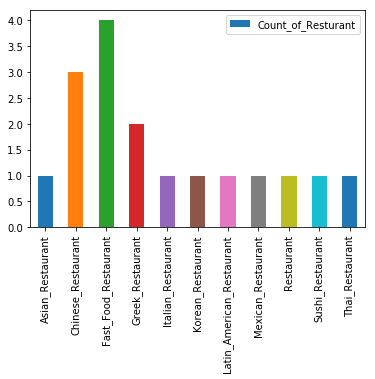

In [31]:
# Get what type of resturant are there in Scarborough

import numpy as np

df_with_venue["Borough"].unique()
df_with_venue_tmp = df_with_venue[df_with_venue["Borough"] == "Scarborough"].copy()
df_with_venue_tmp.dropna(axis=1, how='all',inplace = True)
df_Scarborough_re = pd.DataFrame(df_with_venue_tmp.loc[:,df_with_venue_tmp.columns.str.contains("Restaurant",case=False)].dropna(how='all').replace(np.nan,0).sum(axis = 0))
#df_Scarborough_re.reset_index(inplace=True)
df_Scarborough_re.rename(columns={0:"Count_of_Resturant"},inplace=True)
df_Scarborough_re.plot(kind="bar",y="Count_of_Resturant")

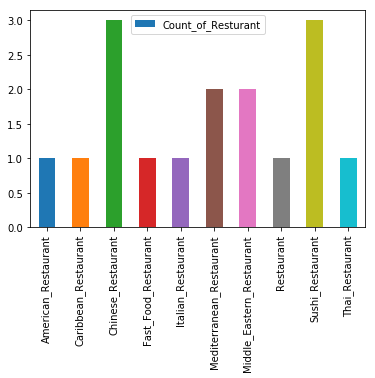

In [32]:
df_with_venue["Borough"].unique()
df_with_venue_tmp_et = df_with_venue[df_with_venue["Borough"] == "Etobicoke"].copy()
df_with_venue_tmp_et.dropna(axis=1, how='all',inplace = True)
df_with_venue_tmp_et
df_Etobicoke_re = pd.DataFrame(df_with_venue_tmp_et.loc[:,df_with_venue_tmp_et.columns.str.contains("Restaurant",case=False)].dropna(how='all').replace(np.nan,0).sum(axis = 0))
df_Etobicoke_re

# #df_Scarborough_re.reset_index(inplace=True)
df_Etobicoke_re.rename(columns={0:"Count_of_Resturant"},inplace=True)
df_Etobicoke_re.plot(kind="bar",y="Count_of_Resturant")


### So, Scarborough and ETOBICOKE & YORK are the two borough where there is lot of South Asian presence but there is no Indian Restaurant.
### Now in order to find out where open the resturant, lets see what are the other socio economic factor here. 

#### Lets see the crime rate in this area. 

In [33]:
tor_crim_csv    = r'C:\Users\supriya\Downloads\Neighbourhood_Crime_Rates_Boundary_File.csv'
df_tor_crime_rt = pd.read_csv(tor_crim_csv)
df_tor_crime_rt.head()

,OBJECTID,Neighbourhood,Hood_ID,Population,Assault_2014,Assault_2015,Assault_2016,Assault_2017,Assault_2018,Assault_2019,...,TheftOver_2015,TheftOver_2016,TheftOver_2017,TheftOver_2018,TheftOver_2019,TheftOver_AVG,TheftOver_CHG,TheftOver_Rate_2019,Shape__Area,Shape__Length
0,1,Yonge-St.Clair,97,12528,20,29,39,27,34,37,...,5,8,0,3,6,4.3,1.00,47.9,1.161315e+06,5873.270582
1,2,York University Heights,27,27593,271,296,361,344,357,370,...,46,37,39,38,28,36.3,-0.26,101.5,1.324666e+07,18504.777326
2,3,Lansing-Westgate,38,16164,44,80,68,85,75,72,...,5,5,11,6,11,7.0,0.83,68.1,5.346186e+06,11112.109625
3,4,Yorkdale-Glen Park,31,14804,106,136,174,161,175,209,...,14,26,23,20,29,22.5,0.45,195.9,6.038326e+06,10079.426920
4,5,Stonegate-Queensway,16,25051,88,71,76,95,87,82,...,8,4,6,7,4,6.0,-0.43,16.0,7.946202e+06,11853.189878


In [34]:
df_tor_crime_rt_tmp = df_tor_crime_rt[df_tor_crime_rt["Neighbourhood"].str.contains("Scarborough|Etobicoke", case=False,regex=True)]
df_tor_crime_rt_tmp_ar = df_tor_crime_rt_tmp.loc[:,["Neighbourhood","Hood_ID","Assault_AVG","AutoTheft_AVG","BreakandEnter_AVG","Homicide_AVG","Robbery_AVG","TheftOver_AVG"]]
df_tor_crime_rt_tmp_ar.reset_index(inplace=True)
df_tor_crime_rt_tmp_ar.drop(["index","Hood_ID"],axis=1,inplace=True)
df_tor_crime_rt_tmp_ar

,Neighbourhood,Assault_AVG,AutoTheft_AVG,BreakandEnter_AVG,Homicide_AVG,Robbery_AVG,TheftOver_AVG
0,Scarborough Village,168.5,17.2,41.3,1.3,25.0,2.7
1,Centennial Scarborough,46.5,9.5,19.2,0.3,7.5,2.0
2,Etobicoke West Mall,49.3,11.2,16.0,0.7,6.7,2.7


In [35]:
df_crm_Sc = pd.DataFrame(df_tor_crime_rt_tmp_ar.loc[0:1,:].sum(axis =0)).T
df_crm_Sc.loc[0,"Neighbourhood"] = "Scarborough"
df_crm_Et = df_tor_crime_rt_tmp_ar[df_tor_crime_rt_tmp_ar["Neighbourhood"] == "Etobicoke West Mall"]
df_crm_Et.loc[2,"Neighbourhood"] = "Etobicoke"
df_crm_Sc_Et = pd.concat([df_crm_Sc,df_crm_Et])
df_crm_Sc_Et.reset_index(inplace=True)
df_crm_Sc_Et.drop("index",axis=1,inplace=True)
df_crm_Sc_Et

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python36_64\Lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Neighbourhood,Assault_AVG,AutoTheft_AVG,BreakandEnter_AVG,Homicide_AVG,Robbery_AVG,TheftOver_AVG
0,Scarborough,215,26.7,60.5,1.6,32.5,4.7
1,Etobicoke,49.3,11.2,16,0.7,6.7,2.7


[Text(0,0,'Scarborough'), Text(0,0,'Etobicoke')]

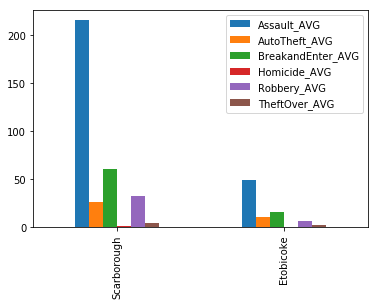

In [36]:
ax = df_crm_Sc_Et.plot(kind="bar")
ax.set_xticklabels(df_crm_Sc_Et.Neighbourhood)

### As seen above with the bar plot the crime rate in the "Scarborough" is much more as compared with "Etobicoke"

# Conclusion 

Various factors need to be studied inorder to decide on the Location such as :

Borough    | South Asian Population | Competitor | Crime Rate profile |
-----------|------------------------|------------|--------------------|
Scarborough| Position 1             | 0          | High               |
Etobicoke  | Position 2             | 0          | Low                |


### Recommendation :- Depending on the south asian population and crime profile it is better to choose for Borough "Etobicoke" as compared to "Scarborough" in order to open the Indian Resturant 






### References :- 

http://www12.statcan.ca/census-recensement/2016/dp-pd/hlt-fst/imm/Table.cfm?Lang=E&T=22&Geo=535
http://data.torontopolice.on.ca/datasets/neighbourhood-crime-rates-boundary-file-/data?orderBy=Neighbourhood